In [13]:
import ssl 

import matplotlib.pylab as plt
import numpy as np
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def plot_params(model): 
    w = model.state_dict()['linear.weight'].data
    w_min = w.min().item()
    w_max = w.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.set_xlabel(f'class: {i}')
            ax.imshow(
                w[i, :].view(28, 28), 
                vmin=w_min,
                vmax=w_max,
                cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title(f'y = {data_sample[1]}')

In [10]:
IMG = '../../../img'

In [14]:
# Create and print the training dataset
train_dataset = dsets.MNIST(
    root=IMG,
    train=True,
    download=True,
    transform=transforms.ToTensor())
print(f'Print the training dataset:\n{train_dataset}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 9876983.77it/s]


Extracting ../../../img/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../../../img/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 337237.45it/s]


Extracting ../../../img/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../../../img/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 3055779.18it/s]


Extracting ../../../img/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../../img/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 5966341.61it/s]

Extracting ../../../img/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../../img/mnist/MNIST/raw

Print the training dataset:
Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../../img/mnist
    Split: Train
    StandardTransform
Transform: ToTensor()


In [16]:
# Create and print the validation dataset
validation_dataset = dsets.MNIST(
    root=IMG, download=True, transform=transforms.ToTensor())
print(f'Print the validation dataset:\n{validation_dataset}')

Print the validation dataset:
Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../../img
    Split: Train
    StandardTransform
Transform: ToTensor()


First Image and Label


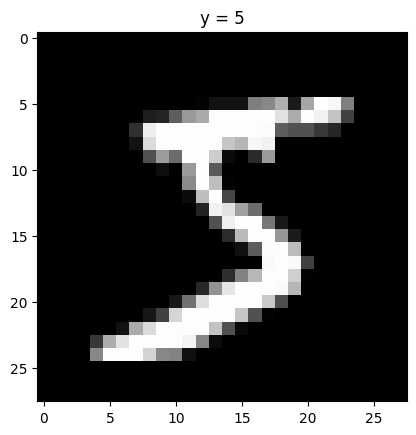

In [17]:
# Print the first image and label
print('First Image and Label') 
show_data(train_dataset[0])

In [18]:
# Print the label
print(f'The label: {train_dataset[3][1]}')

The label: 1


The image:


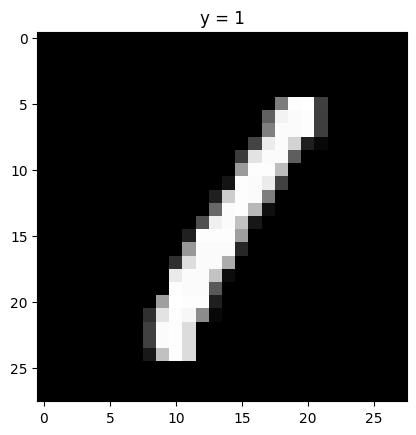

In [19]:
# Plot the image
print('The image:')
show_data(train_dataset[3])

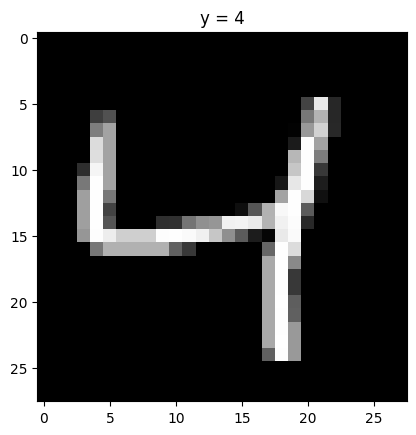

In [20]:
show_data(train_dataset[2])

In [21]:
# Define softmax classifier class
# Inherits nn.Module which is the base class for all neural networks
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        z = self.linear(x)
        return z

In [22]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [23]:
# Set input size and output size
input_dim = 28 * 28
output_dim = 10

In [24]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 possible digits the image can
# be
model = SoftMax(input_dim, output_dim)
print(model)

SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [25]:
print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


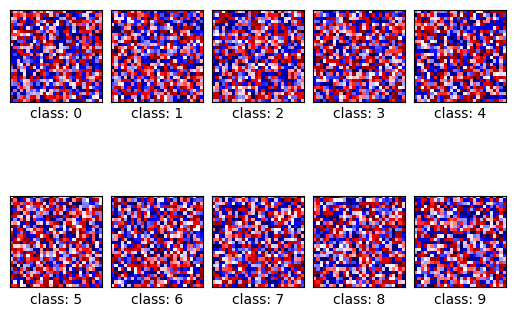

In [26]:
plot_params(model)

In [27]:
# First we get the X value of the first image
X = train_dataset[0][0]
# We can see the shape is 1 by 28 by 28, we need it to be flattened to
# 1 by 28 * 28 (784)
print(X.shape)
X = X.view(-1, 28 * 28)
print(X.shape)
# Now we can make a prediction, each class has a value, and the higher
# it is the more confident the model is that it is that digit
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[-0.1489, -0.2159, -0.0210,  0.3449,  0.0521,  0.0657, -0.0294, -0.0458,
         -0.1239, -0.1827]], grad_fn=<AddmmBackward0>)

In [28]:
# Define the learning rate, optimizer, criterion, and data loader
learning_rate = 0.1
# The optimizer will updates the model parameters using the learning
# rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# The criterion will measure the loss between the prediction and actual
# label values. This is where the SoftMax occurs, it is built into the
# Criterion Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=100)
# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(
    dataset=validation_dataset, batch_size=5000)

Output:  tensor([[-0.1489, -0.2159, -0.0210,  0.3449,  0.0521,  0.0657, -0.0294, -0.0458,
         -0.1239, -0.1827]], grad_fn=<AddmmBackward0>)
Actual: tensor([5])


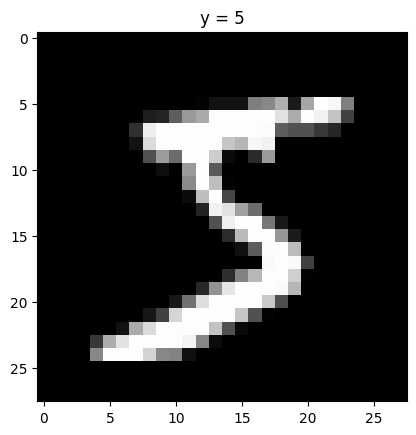

In [29]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])
show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)

In [30]:
criterion(model_output, actual)

tensor(2.2190, grad_fn=<NllLossBackward0>)

In [31]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.0877, 0.0820, 0.0997, 0.1437, 0.1072, 0.1087, 0.0989, 0.0972, 0.0899,
         0.0848]], grad_fn=<SoftmaxBackward0>)


In [32]:
-1 * torch.log(probability[0][actual])

tensor([2.2190], grad_fn=<MulBackward0>)

In [33]:
# Number of times we train our model useing the training data
EPOCHS = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_TEST = len(validation_dataset)

In [35]:
# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        print('Epoch: ', epoch + 1)
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done
            # each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated 
            # gradient value
            optimizer.step()
        # Each epoch we check how the model performs with data it has
        # not seen which is the validation data, we are not training 
        # here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and
            # increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of
        # validation dataset
        accuracy = correct / N_TEST
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

In [37]:
# Function call
train_model(EPOCHS)

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10


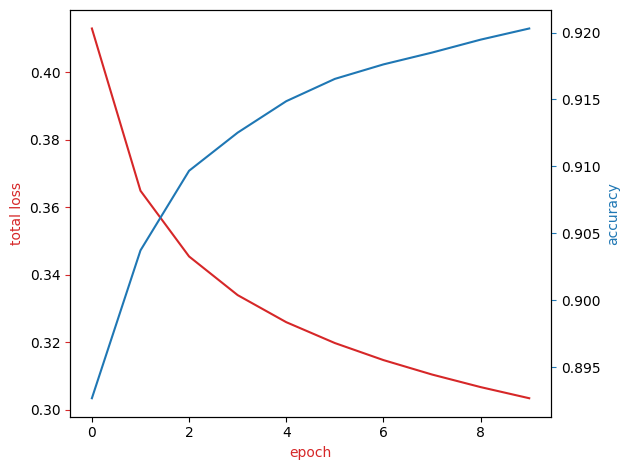

In [38]:
# Plot the loss and accuracy
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

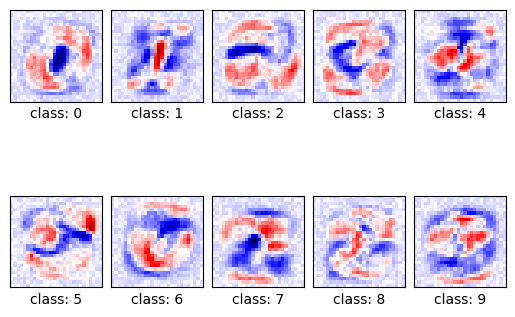

In [39]:
# Plot the parameters
plot_params(model)

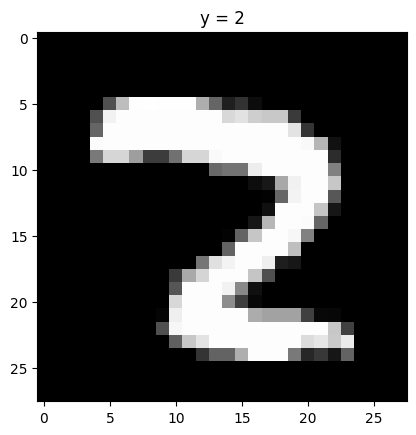

yhat: tensor([7])
probability of class  0.696483850479126


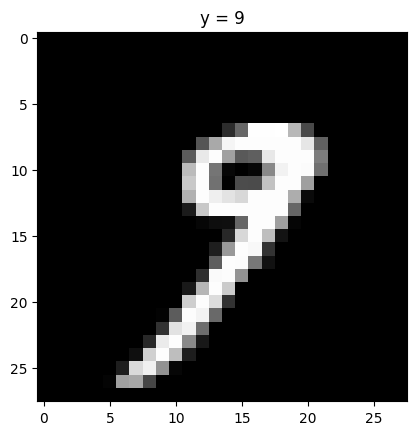

yhat: tensor([7])
probability of class  0.7014594674110413


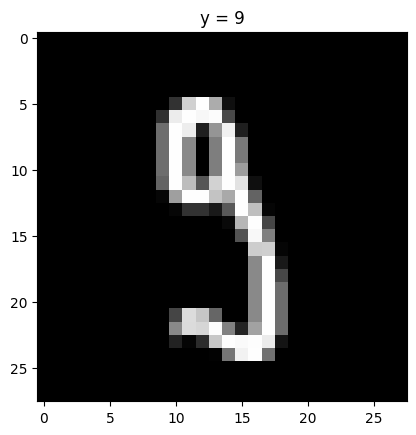

yhat: tensor([5])
probability of class  0.7263329029083252


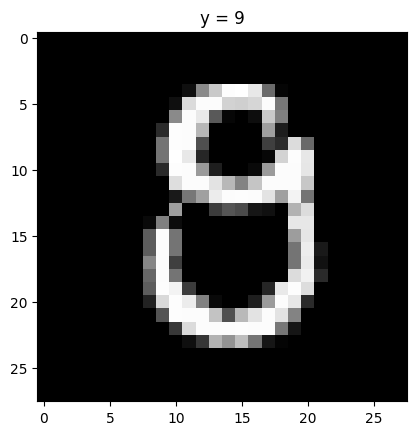

yhat: tensor([8])
probability of class  0.3700173497200012


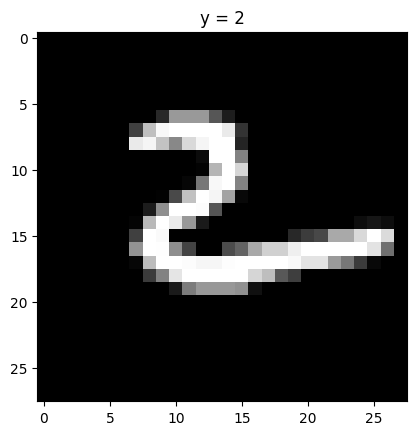

yhat: tensor([6])
probability of class  0.5129974484443665


In [40]:
# Plot the misclassified samples
softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

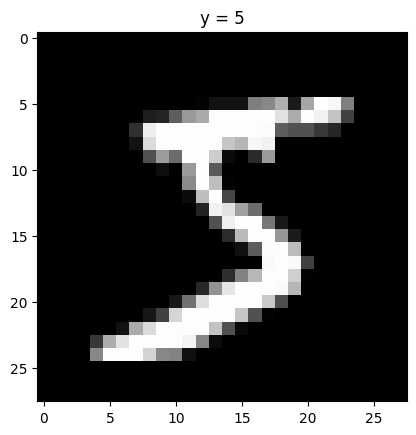

yhat: tensor([5])
probability of class  0.849001944065094


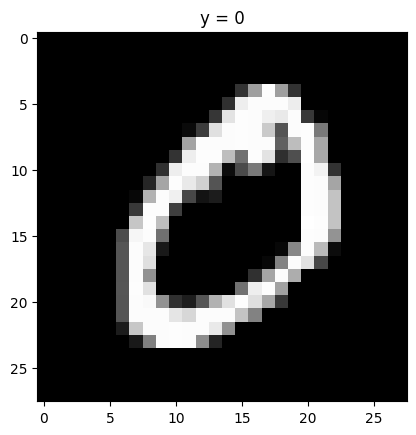

yhat: tensor([0])
probability of class  0.9997223019599915


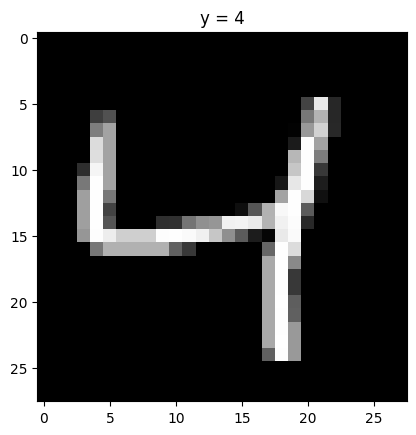

yhat: tensor([4])
probability of class  0.8627621531486511


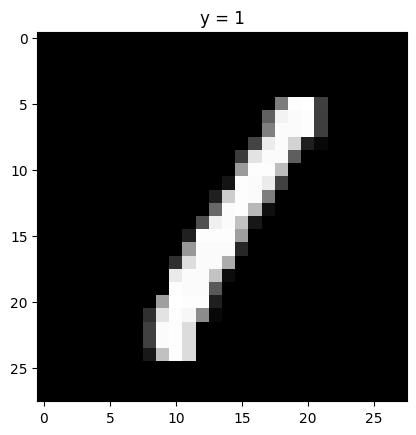

yhat: tensor([1])
probability of class  0.9649727940559387


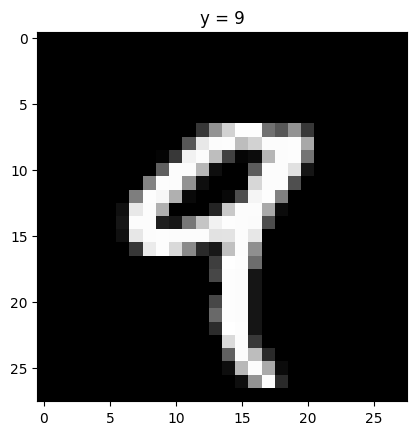

yhat: tensor([9])
probability of class  0.9265738129615784


In [41]:
# Plot the classified samples
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  